### 데이터 교차보기

In [ ]:
trdf[['Pclass','Survived']].groupby(['Survived']).mean()

In [ ]:
pd.crosstab(trdf['Title'],trdf['Sex'])

### 유니크 데이터만 출력

In [ ]:
trdf.Embarked.unique()

### 칼럼 내 비어있는값 개수 확인

In [ ]:
trdf.isna().sum()

### 칼럼 삭제

In [ ]:
trdf.drop(['Ticket','PassengerId'], axis=1)

### 칼럼추출 및 생성

In [ ]:
for dataset in combine:
    dataset['Title']=dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)
    dataset['Deep'] = dataset.Cabin.str.extract('([A-Za-z])',expand=False)

### 칼럼 내용 변경

In [ ]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Capt','Col','Don','Dr','Jonkheer','Major','Rev','Sir'],'Mr')
    dataset['Title'] = dataset['Title'].replace(['Countess','Lady','Dona'],'Mrs')
    dataset['Title'] = dataset['Title'].replace(['Ms','Mlle','Mme'],'Miss')

### 비어있는 na 채우기

In [ ]:
test_df['Fare']=test_df['Fare'].fillna(8.0500)

### 지정된 데이터가 있는 행에 다른 열 데이터 수정

In [ ]:
for dataset in combine:
    dataset.loc[(dataset.Age.isnull())&(dataset.equals('Mr')),'Age']=33
    dataset.loc[(dataset.Age.isnull())&(dataset.equals('Mrs')),'Age']=35
    dataset.loc[(dataset.Age.isnull())&(dataset.equals('Miss')),'Age']=21
    dataset.loc[(dataset.Age.isnull())&(dataset.equals('Master')),'Age']=4


### 열 데이터 수정

In [ ]:
for dataset in combine:
    dataset["Title"]=dataset["Title"].map({"Master":1,"Miss":2,"Mr":3,"Mrs":4})
train_df.Title

0      3
1      4
2      2
3      4
4      3
      ..
886    3
887    2
888    2
889    3
890    3
Name: Title, Length: 891, dtype: int64

### 그래프 데이터 수정

/home/lss/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


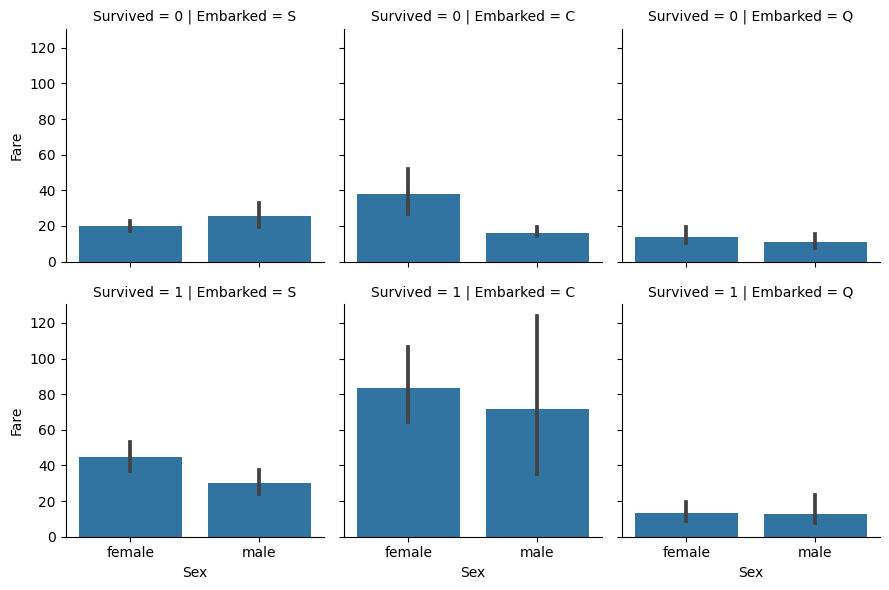

In [ ]:
sns.FacetGrid(trdf, col='Embarked', row='Survived').map(sns.barplot, 'Sex','Fare')